<h1><b>Exploratory data analysis</h1></b>

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_final = pd.read_csv(os.path.join('df_final.csv')) 
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7953 entries, 0 to 7952
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7953 non-null   int64  
 1   Unnamed: 0.1    7953 non-null   int64  
 2   Name            7953 non-null   object 
 3   Team            7953 non-null   object 
 4   Age             7953 non-null   int64  
 5   Apps            7953 non-null   int64  
 6   start_bench     7953 non-null   int64  
 7   Mins            7953 non-null   int64  
 8   Goals           7953 non-null   int64  
 9   Assists         7953 non-null   int64  
 10  Yel             7953 non-null   int64  
 11  Red             7953 non-null   int64  
 12  SpG             7953 non-null   float64
 13  PS%             7953 non-null   float64
 14  AerialsWon      7953 non-null   float64
 15  MotM            7953 non-null   int64  
 16  Rating          7953 non-null   float64
 17  League          7953 non-null   o

In [3]:
#date_of_birth and contract_until variables are datetime
df_final['date_of_birth'] = pd.to_datetime(df_final['date_of_birth'], errors='coerce')
df_final['contract_until'] = pd.to_datetime(df_final['contract_until'], errors='coerce')
df_final['joined'] = pd.to_datetime(df_final['joined'], errors='coerce')

In [4]:
# remove unnecessary columns
df_final.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'name'], inplace = True)

> Before starting with the EDA I would like to set a criteria to remove players with less than a certain number of games during the last season. I will consider only players who played at least 10% of games of their league during the last season. If the league consists of a regular season + finals (like the MLS) the 10% percentage is calculated ONLY on the regular season games

In [5]:
#calculate the number of total appearences 
df_final['tot_apps'] = df_final['Apps'] + df_final['start_bench']

In [6]:
#define how many games in each league
df_final.loc[df_final['League'] == 'Premier_league', 'league_games_tot'] = 38 
df_final.loc[df_final['League'] == 'Serie_A', 'league_games_tot'] = 38 
df_final.loc[df_final['League'] == 'La_Liga', 'league_games_tot'] = 38 
df_final.loc[df_final['League'] == 'Bundesliga', 'league_games_tot'] = 34 
df_final.loc[df_final['League'] == 'Ligue_1', 'league_games_tot'] = 38 
df_final.loc[df_final['League'] == 'Liga_nos', 'league_games_tot'] = 34 
df_final.loc[df_final['League'] == 'Eredivisie', 'league_games_tot'] = 34 
df_final.loc[df_final['League'] == 'Russian_premier_league', 'league_games_tot'] = 30 
df_final.loc[df_final['League'] == 'Brasileirao', 'league_games_tot'] = 38 
df_final.loc[df_final['League'] == 'MLS', 'league_games_tot'] = 34
df_final.loc[df_final['League'] == 'Super_lig', 'league_games_tot'] = 40
df_final.loc[df_final['League'] == 'Championship', 'league_games_tot'] = 46
df_final.loc[df_final['League'] == 'Premiership', 'league_games_tot'] = 38 
df_final.loc[df_final['League'] == 'League_one', 'league_games_tot'] = 46 
df_final.loc[df_final['League'] == 'League_two', 'league_games_tot'] = 46 
df_final.loc[df_final['League'] == 'Superliga', 'league_games_tot'] = 25 
df_final.loc[df_final['League'] == 'Jupiler_league', 'league_games_tot'] = 34 
df_final.loc[df_final['League'] == 'Bundesliga_2', 'league_games_tot'] = 34 

In [7]:
#calculate percentages of seasonal appearances for each player
df_final['seasonal_games_perc'] = (df_final['tot_apps'] / df_final['league_games_tot']) *100

#Important: there are 38 players where the % in seasonal_games_perc exceed 100 (just a little).
#Those suggest small mistakes such as 1/2 more games counted by whoscored. 
#This is not a big issue because this variable will be standardized if considered for foture analysis.

In [8]:
df_final = df_final[~(df_final['seasonal_games_perc'] < 10)] 

> Another criteria to clean the data si to exclude the players who failed to accumulate a total playing time of a single game (90' mins) 

In [9]:
df_final = df_final[~(df_final['Mins'] < 90)] 

<h3><b>Variables exploration</b></h3>

> I start plotting each varaible distribution in order to find possible criteria to further clean the data

In [10]:
df_final.market_value.min()

25000.0

count    6.831000e+03
mean     4.701442e+06
std      1.024427e+07
min      2.500000e+04
25%      4.000000e+05
50%      1.100000e+06
75%      4.000000e+06
max      1.600000e+08
Name: market_value, dtype: float64


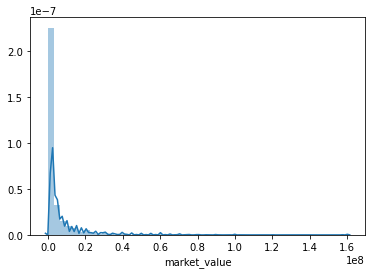

In [11]:
print(df_final.market_value.describe())

sns.distplot(df_final.market_value)

> The prices distribution is very skewed. I try to check the log transformation

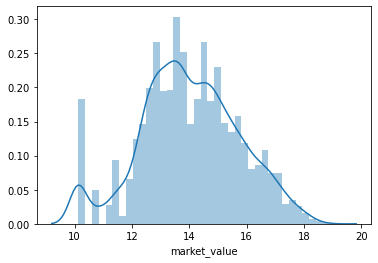

In [12]:
check= np.log1p(df_final.market_value)
sns.distplot(check);

> <h5><b>Age</b></h5>

count    6831.000000
mean       26.589958
std         4.370011
min        16.000000
25%        23.000000
50%        26.000000
75%        30.000000
max        43.000000
Name: Age, dtype: float64


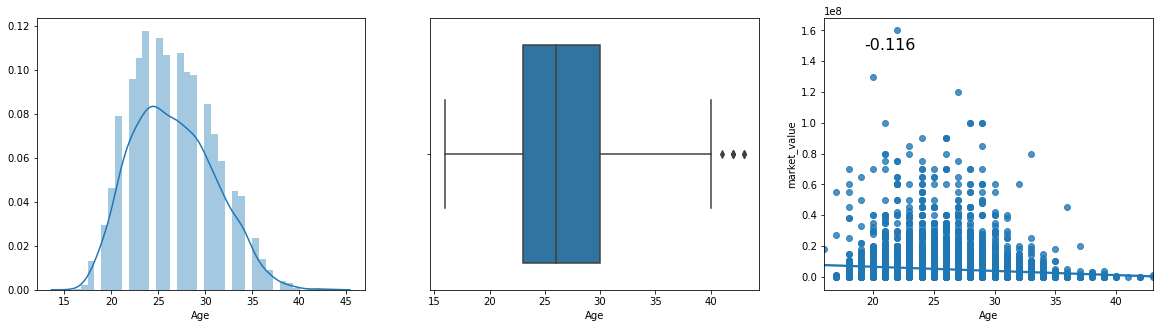

In [13]:
print(df_final.Age.describe())
cor=df_final['Age'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Age, ax=ax1)
sns.boxplot(df_final.Age, ax=ax2)
sns.regplot(x='Age', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Apps (appearances from the first minute)</b></h5>

count    6831.000000
mean       17.033963
std        11.039329
min         0.000000
25%         7.000000
50%        16.000000
75%        25.000000
max        48.000000
Name: Apps, dtype: float64


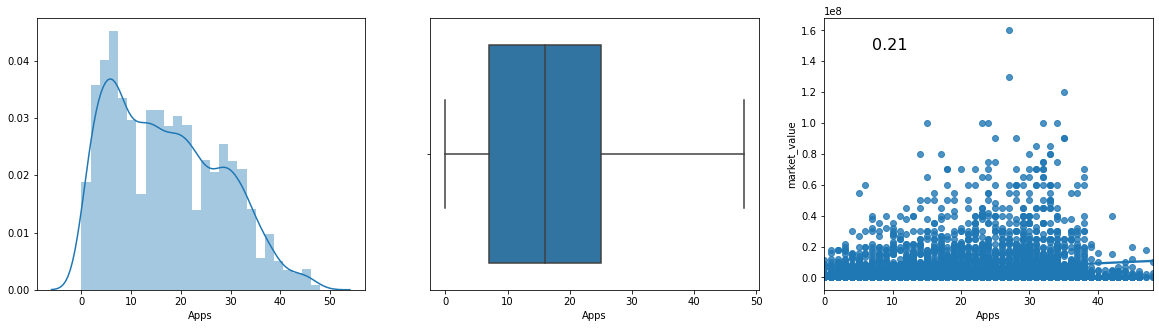

In [14]:
print(df_final.Apps.describe())
cor=df_final['Apps'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Apps, ax=ax1)
sns.boxplot(df_final.Apps, ax=ax2)
sns.regplot(x='Apps', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Start_bench (number of games a player started from the bench)</b></h5>

count    6831.000000
mean        5.075831
std         5.150285
min         0.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        32.000000
Name: start_bench, dtype: float64


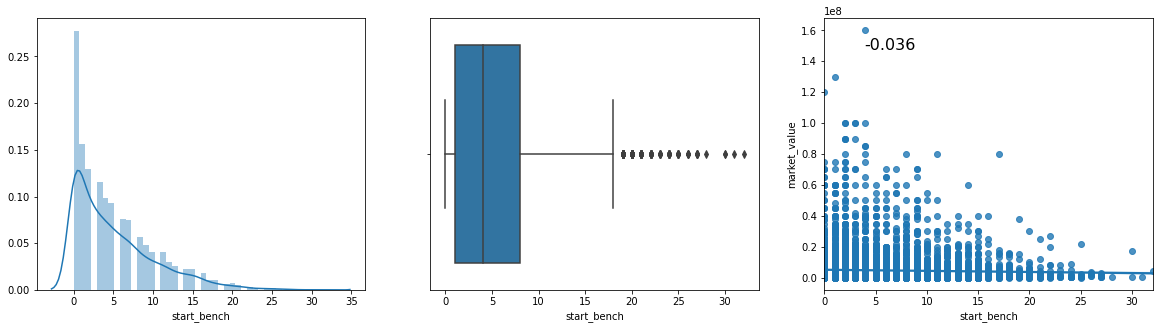

In [15]:
print(df_final.start_bench.describe())
cor=df_final['start_bench'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.start_bench, ax=ax1)
sns.boxplot(df_final.start_bench, ax=ax2)
sns.regplot(x='start_bench', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>tot_apps</b></h5>

count    6831.000000
mean       22.109794
std        10.529187
min         3.000000
25%        14.000000
50%        22.000000
75%        30.000000
max        49.000000
Name: tot_apps, dtype: float64


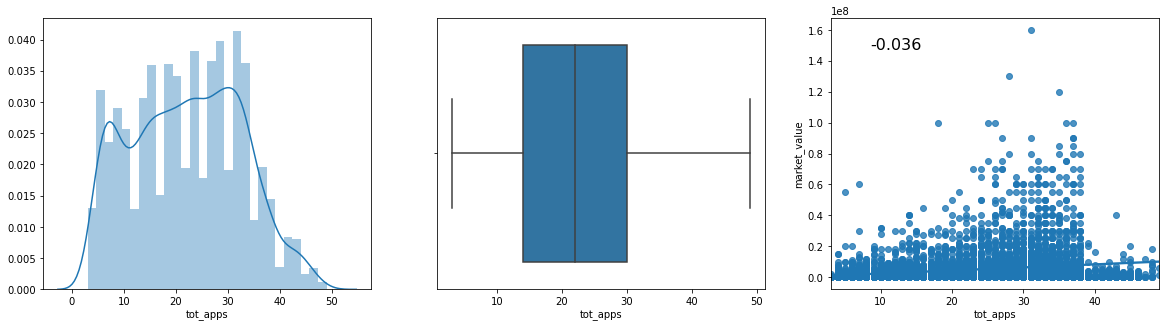

In [16]:
print(df_final.tot_apps.describe())
cor=df_final['start_bench'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.tot_apps, ax=ax1)
sns.boxplot(df_final.tot_apps, ax=ax2)
sns.regplot(x='tot_apps', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Mins (minutes played in the season)</b></h5>

count    6831.000000
mean     1523.909969
std       952.453984
min        90.000000
25%       694.500000
50%      1402.000000
75%      2232.000000
max      4379.000000
Name: Mins, dtype: float64


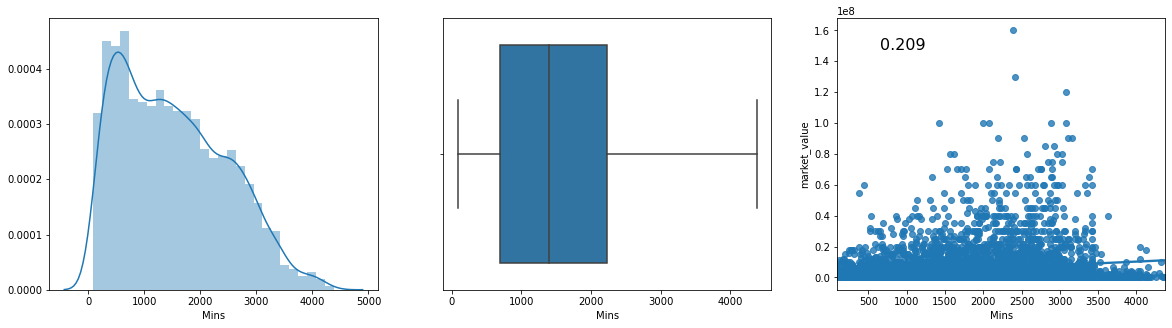

In [17]:
print(df_final.Mins.describe())
cor=df_final['Mins'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Mins, ax=ax1)
sns.boxplot(df_final.Mins, ax=ax2)
sns.regplot(x='Mins', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Goals</b></h5>

count    6831.000000
mean        2.017567
std         3.428113
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        41.000000
Name: Goals, dtype: float64


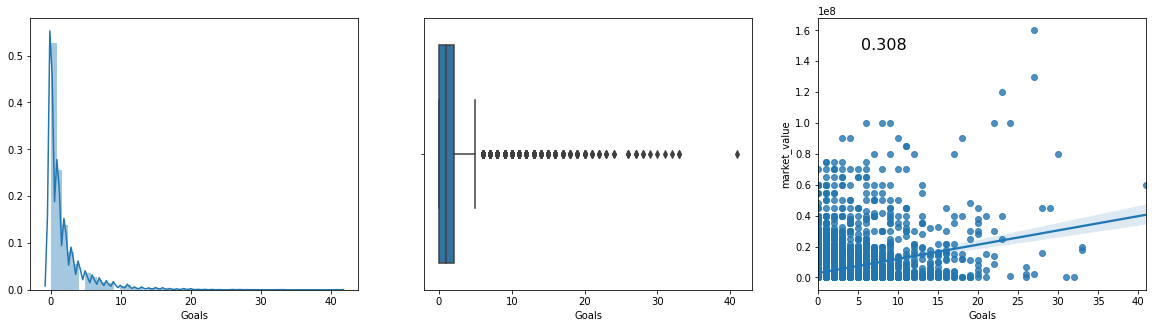

In [18]:
print(df_final.Goals.describe())
cor=df_final['Goals'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Goals, ax=ax1)
sns.boxplot(df_final.Goals, ax=ax2)
sns.regplot(x='Goals', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Assists</b></h5>

count    6831.000000
mean        1.369199
std         1.997468
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: Assists, dtype: float64


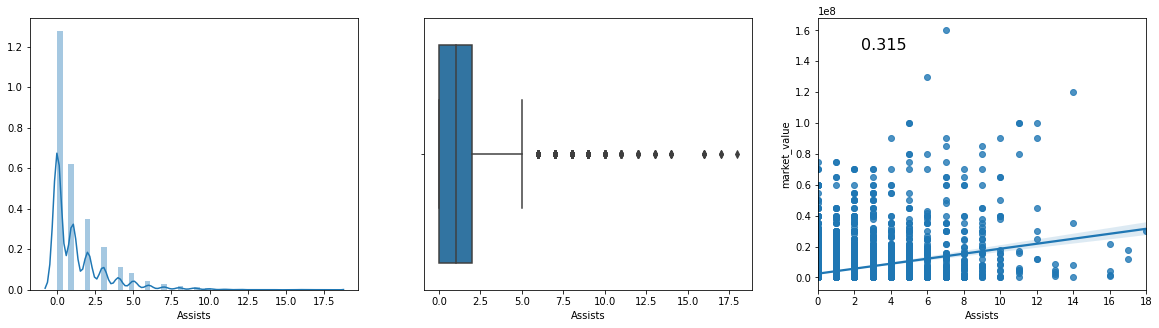

In [19]:
print(df_final.Assists.describe())
cor=df_final['Assists'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Assists, ax=ax1)
sns.boxplot(df_final.Assists, ax=ax2)
sns.regplot(x='Assists', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Yel (yellow cards)</b></h5>

count    6831.000000
mean        2.730933
std         2.466865
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        15.000000
Name: Yel, dtype: float64


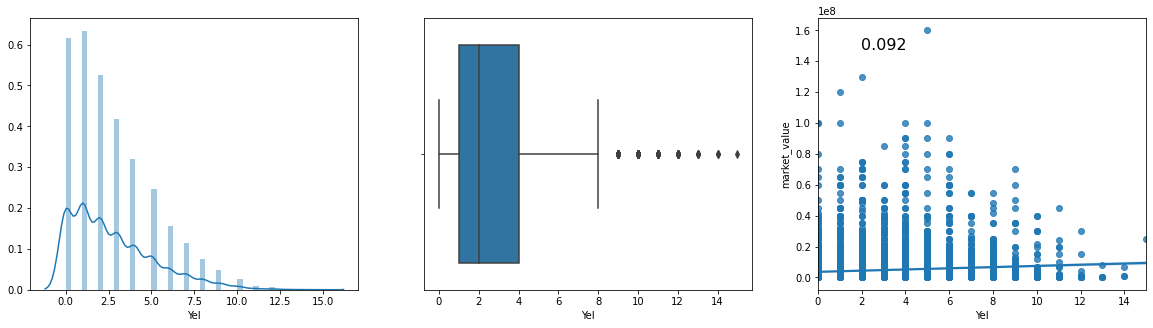

In [20]:
print(df_final.Yel.describe())
cor=df_final['Yel'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Yel, ax=ax1)
sns.boxplot(df_final.Yel, ax=ax2)
sns.regplot(x='Yel', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Red (red cards)</b></h5>

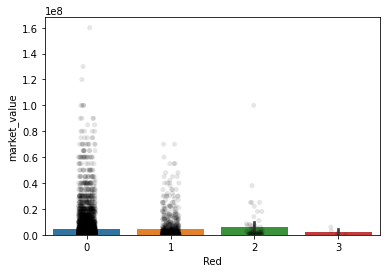

In [21]:
sns.barplot(x='Red', y='market_value', data=df_final)
sns.stripplot(x='Red', y='market_value', data=df_final, color='0', alpha=.1);

> <h5><b>SpG (mean Shots per game)</b></h5>

count    6831.000000
mean        0.766608
std         0.666655
min         0.000000
25%         0.300000
50%         0.600000
75%         1.100000
max         5.600000
Name: SpG, dtype: float64


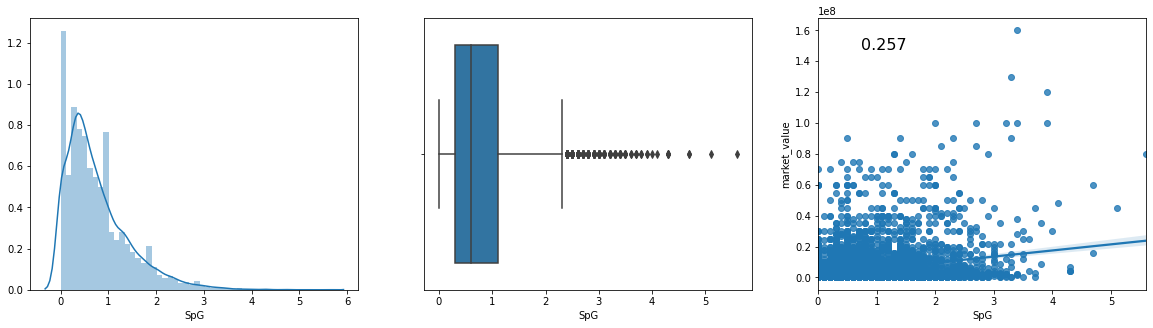

In [22]:
print(df_final.SpG.describe())
cor=df_final['SpG'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.SpG, ax=ax1)
sns.boxplot(df_final.SpG, ax=ax2)
sns.regplot(x='SpG', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>PS% (pass success percentage)</b></h5>

In [23]:
#to make it simpler the variable is rename removing the % character
df_final.rename(columns={'PS%': 'PS_perc'}, inplace=True)

count    6831.000000
mean       75.304011
std         9.899650
min        23.700000
25%        69.900000
50%        76.800000
75%        82.500000
max        96.700000
Name: PS_perc, dtype: float64


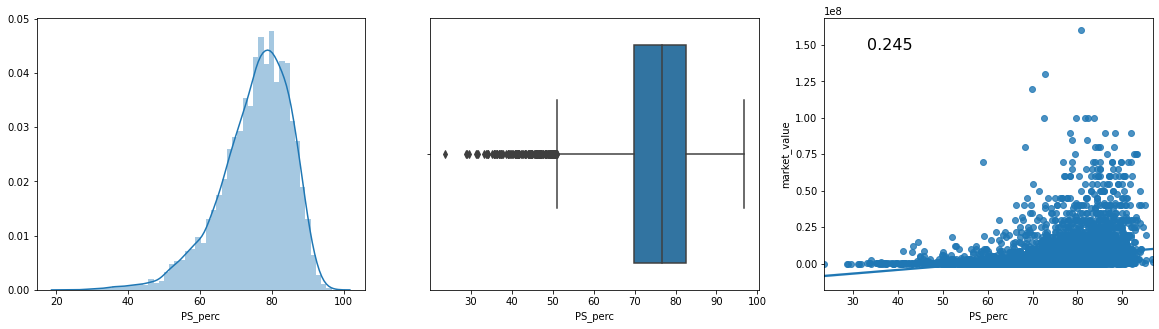

In [24]:
print(df_final.PS_perc.describe())
cor=df_final['PS_perc'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.PS_perc, ax=ax1)
sns.boxplot(df_final.PS_perc, ax=ax2)
sns.regplot(x='PS_perc', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> A % of pass success below 50% is rather unrealistic for a professional player unleass they played very few minutes starting from bench. Furthermore, there are some players with 0% which is probably a mistake. As a general crieria I will remove all the players with PS_perc < 50

In [25]:
df_final = df_final[~(df_final['PS_perc'] < 50)] 

count    6712.000000
mean       75.883924
std         8.937108
min        50.000000
25%        70.300000
50%        77.000000
75%        82.600000
max        96.700000
Name: PS_perc, dtype: float64


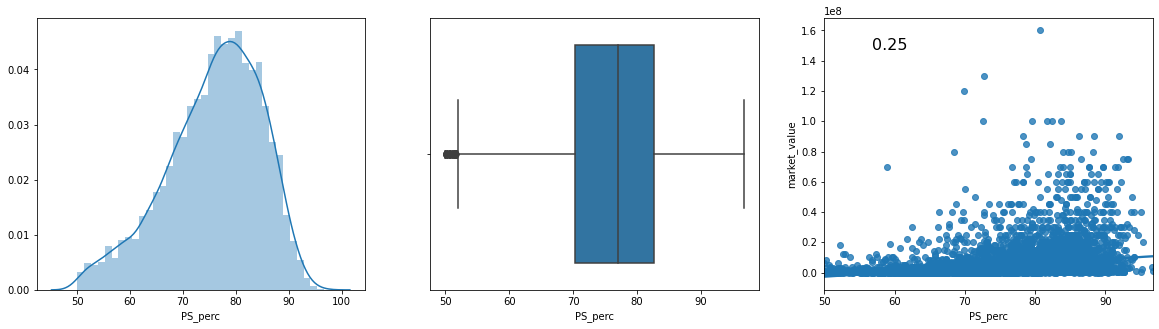

In [26]:
print(df_final.PS_perc.describe())
cor=df_final['PS_perc'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.PS_perc, ax=ax1)
sns.boxplot(df_final.PS_perc, ax=ax2)
sns.regplot(x='PS_perc', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>AerialsWon (Aerial duels won per game mean)</b></h5>

count    6712.000000
mean        1.231630
std         1.172739
min         0.000000
25%         0.400000
50%         0.900000
75%         1.700000
max        10.500000
Name: AerialsWon, dtype: float64


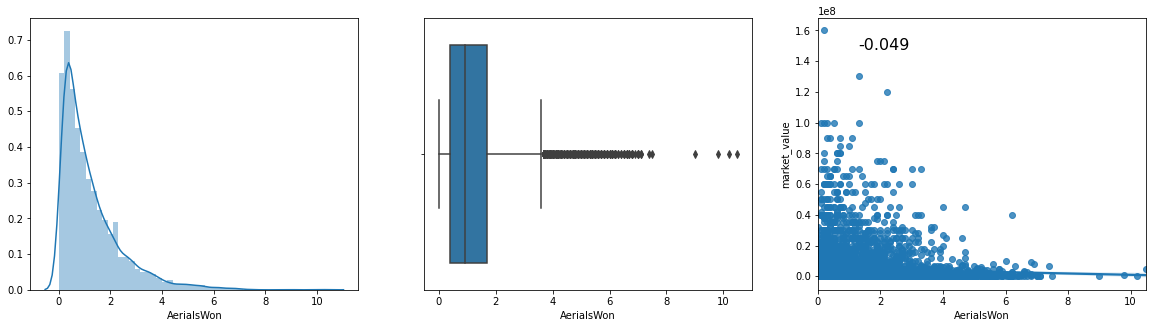

In [27]:
print(df_final.AerialsWon.describe())
cor=df_final['AerialsWon'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.AerialsWon, ax=ax1)
sns.boxplot(df_final.AerialsWon, ax=ax2)
sns.regplot(x='AerialsWon', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>MotM (Man of the match )</b></h5>

count    6712.000000
mean        0.787545
std         1.390574
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        22.000000
Name: MotM, dtype: float64


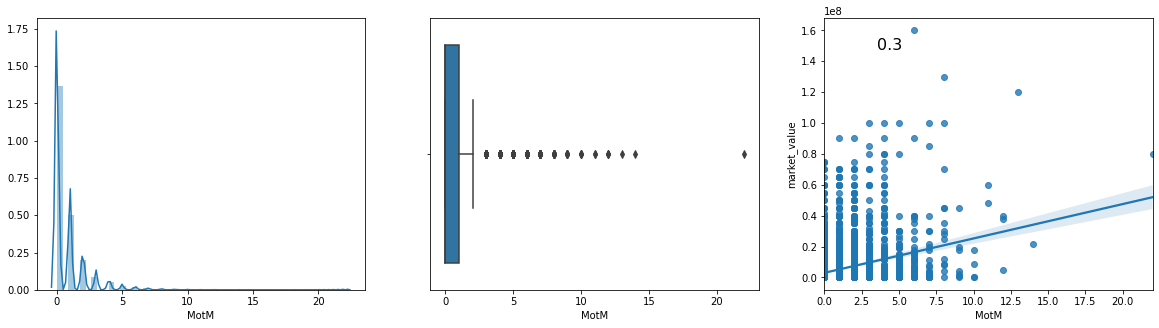

In [28]:
print(df_final.MotM.describe())
cor=df_final['MotM'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.MotM, ax=ax1)
sns.boxplot(df_final.MotM, ax=ax2)
sns.regplot(x='MotM', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

In [29]:
df_final.loc[(df_final['MotM'] > 20)]
#the most extrem case is Messi, which makes sense...

,Name,Team,Age,Apps,start_bench,Mins,Goals,Assists,Yel,Red,...,foot,joined,contract_until,market_value,nationality_1,nationality_2,nationality_3,tot_apps,league_games_tot,seasonal_games_perc
4602,Lionel Messi,Barcelona,33,33,2,3023,30,9,4,0,...,left,2005-07-01,2021-06-30,80000000.0,'Argentina','Spain',None,35,38.0,92.105263


> <h5><b>Rating (based on whoscored method)</b></h5>

count    6712.000000
mean        6.618592
std         0.295720
min         5.710000
25%         6.410000
50%         6.600000
75%         6.810000
max         8.520000
Name: Rating, dtype: float64


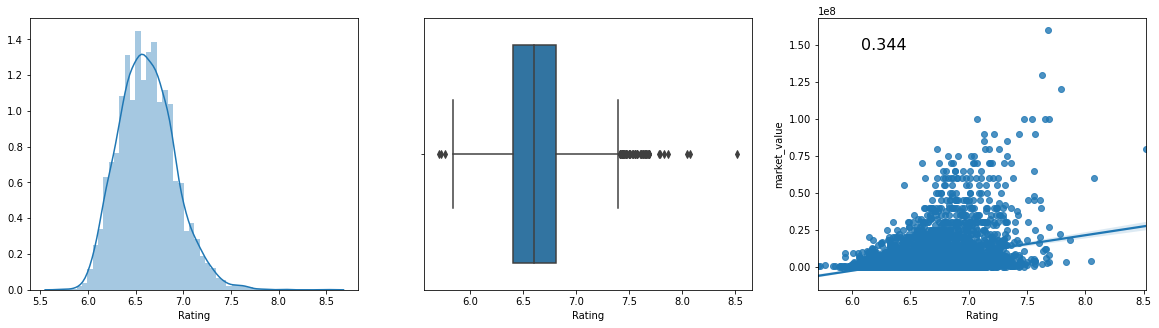

In [30]:
print(df_final.Rating.describe())
cor=df_final['Rating'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Rating, ax=ax1)
sns.boxplot(df_final.Rating, ax=ax2)
sns.regplot(x='Rating', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Tackles (Tackles per game mean)</b></h5>

count    6712.000000
mean        1.043504
std         0.694684
min         0.000000
25%         0.500000
50%         1.000000
75%         1.500000
max         5.000000
Name: Tackles, dtype: float64


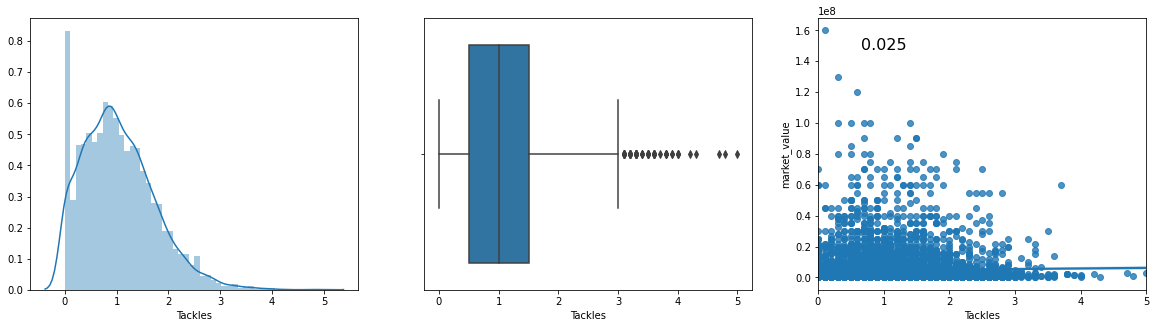

In [31]:
print(df_final.Tackles.describe())
cor=df_final['Tackles'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Tackles, ax=ax1)
sns.boxplot(df_final.Tackles, ax=ax2)
sns.regplot(x='Tackles', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Inter (Interceptions per game mean)</b></h5>

count    6712.000000
mean        0.777965
std         0.618853
min         0.000000
25%         0.300000
50%         0.700000
75%         1.200000
max         3.800000
Name: Inter, dtype: float64


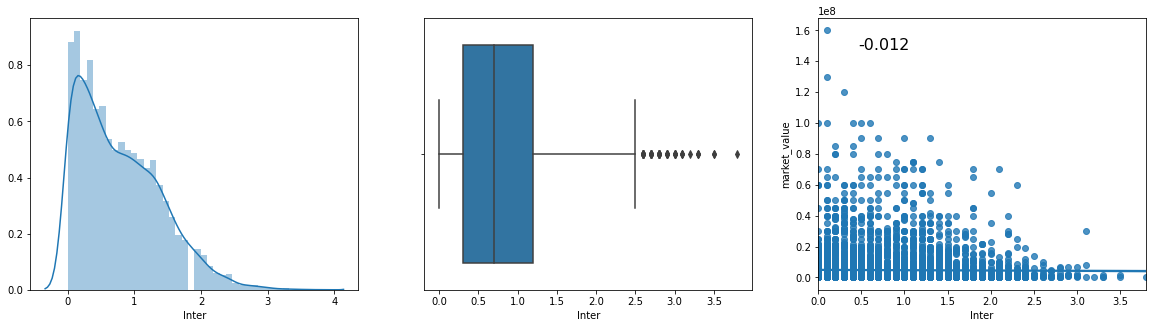

In [32]:
print(df_final.Inter.describe())
cor=df_final['Inter'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Inter, ax=ax1)
sns.boxplot(df_final.Inter, ax=ax2)
sns.regplot(x='Inter', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Fouls (Fouls per game)</b></h5>

count    6712.000000
mean        0.870739
std         0.485516
min         0.000000
25%         0.500000
50%         0.800000
75%         1.200000
max         3.600000
Name: Fouls, dtype: float64


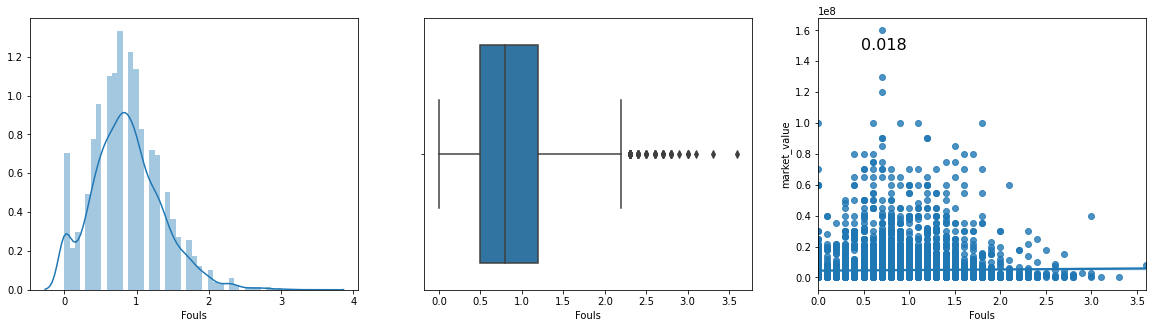

In [33]:
print(df_final.Fouls.describe())
cor=df_final['Fouls'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Fouls, ax=ax1)
sns.boxplot(df_final.Fouls, ax=ax2)
sns.regplot(x='Fouls', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Offsides (Offside won per game mean)</b></h5>

count    6712.000000
mean        0.121856
std         0.211678
min         0.000000
25%         0.000000
50%         0.000000
75%         0.200000
max         1.400000
Name: Offsides, dtype: float64


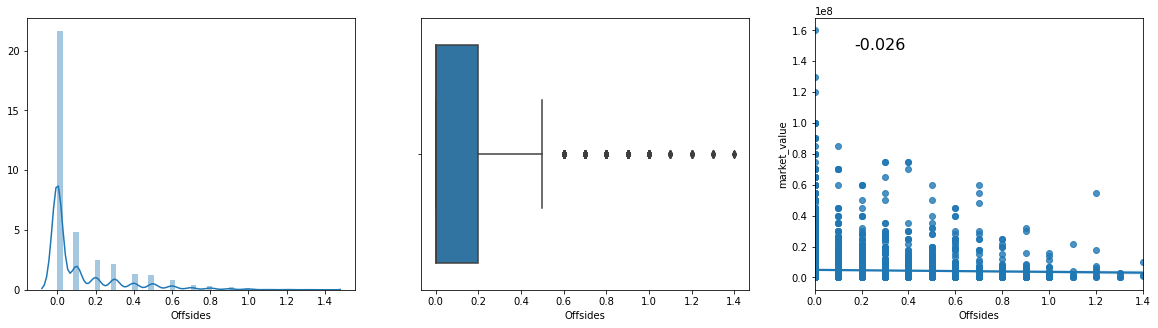

In [34]:
print(df_final.Offsides.describe())
cor=df_final['Offsides'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Offsides, ax=ax1)
sns.boxplot(df_final.Offsides, ax=ax2)
sns.regplot(x='Offsides', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Clear (Clearances per game)</b></h5>

count    6712.000000
mean        1.214333
std         1.236553
min         0.000000
25%         0.300000
50%         0.800000
75%         1.700000
max         8.700000
Name: Clear, dtype: float64


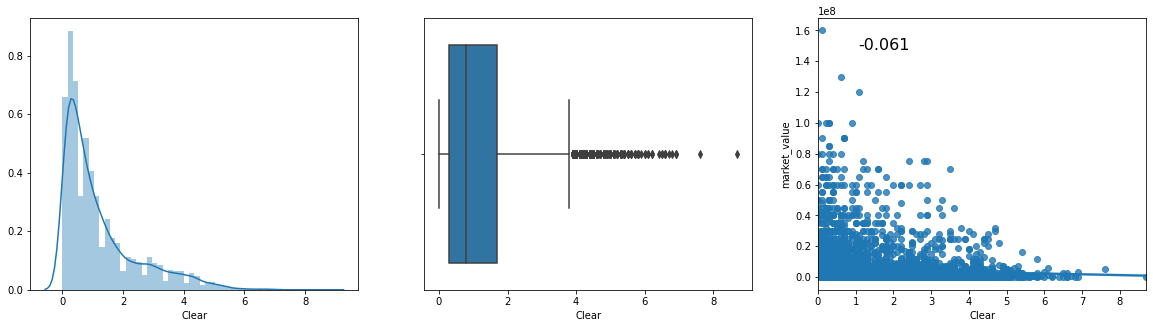

In [35]:
print(df_final.Clear.describe())
cor=df_final['Clear'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Clear, ax=ax1)
sns.boxplot(df_final.Clear, ax=ax2)
sns.regplot(x='Clear', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Drb_past (Dribbled past per game)</b></h5>

count    6712.000000
mean        0.562366
std         0.408594
min         0.000000
25%         0.300000
50%         0.500000
75%         0.800000
max         2.800000
Name: Drb_past, dtype: float64


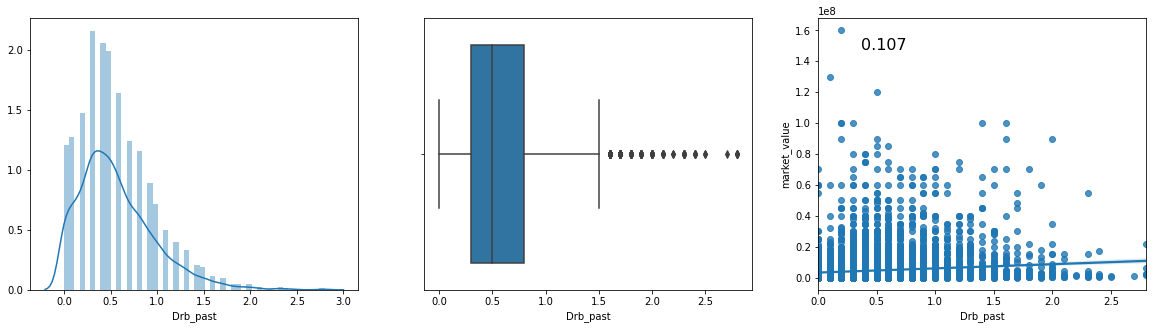

In [36]:
print(df_final.Drb_past.describe())
cor=df_final['Drb_past'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Drb_past, ax=ax1)
sns.boxplot(df_final.Drb_past, ax=ax2)
sns.regplot(x='Drb_past', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Blocks (Outfielder Block Per Game)</b></h5>

count    6712.000000
mean        0.203576
std         0.252165
min         0.000000
25%         0.000000
50%         0.100000
75%         0.300000
max         1.800000
Name: Blocks, dtype: float64


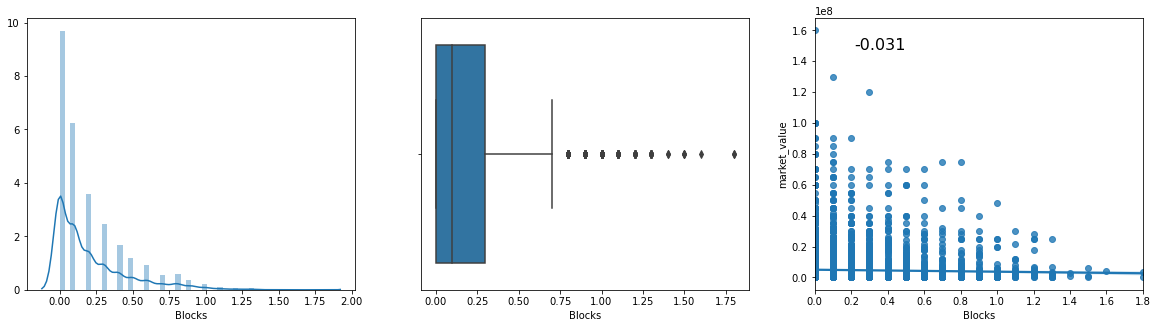

In [37]:
print(df_final.Blocks.describe())
cor=df_final['Blocks'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Blocks, ax=ax1)
sns.boxplot(df_final.Blocks, ax=ax2)
sns.regplot(x='Blocks', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>OwnG (Own goals)</b></h5>

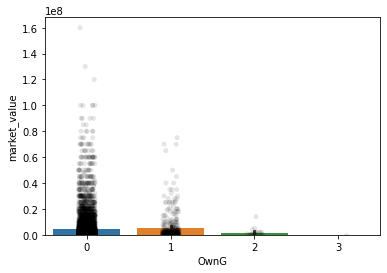

In [38]:
sns.barplot(x='OwnG', y='market_value', data=df_final)
sns.stripplot(x='OwnG', y='market_value', data=df_final, color='0', alpha=.1);

> <h5><b>Drb_per_game (Dribbles per game)</b></h5>

count    6712.000000
mean        0.551847
std         0.523917
min         0.000000
25%         0.200000
50%         0.400000
75%         0.800000
max         4.800000
Name: Drb_per_game, dtype: float64


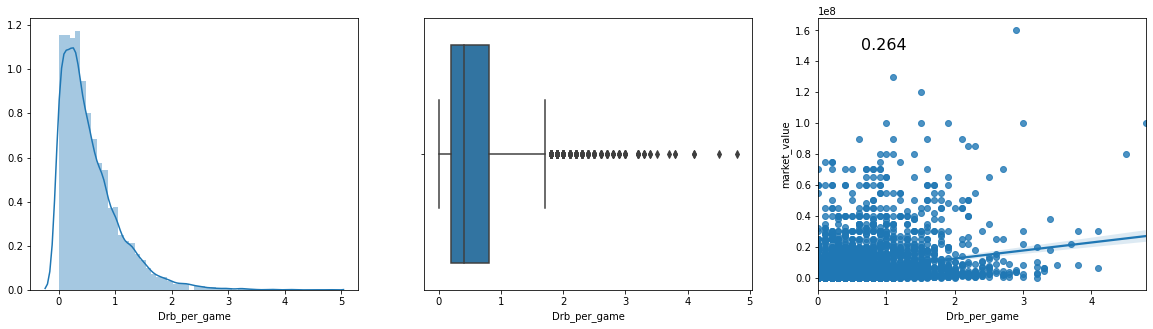

In [39]:
print(df_final.Drb_per_game.describe())
cor=df_final['Drb_per_game'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Drb_per_game, ax=ax1)
sns.boxplot(df_final.Drb_per_game, ax=ax2)
sns.regplot(x='Drb_per_game', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Fouled (Fouled per game)</b></h5>

count    6712.000000
mean        0.798897
std         0.545322
min         0.000000
25%         0.400000
50%         0.700000
75%         1.100000
max         4.200000
Name: Fouled, dtype: float64


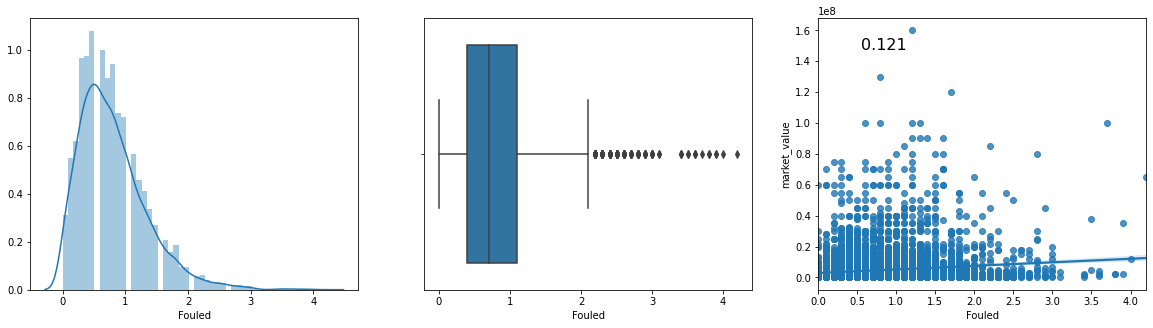

In [40]:
print(df_final.Fouled.describe())
cor=df_final['Fouled'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Fouled, ax=ax1)
sns.boxplot(df_final.Fouled, ax=ax2)
sns.regplot(x='Fouled', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Off (Offsides per game)</b></h5>

count    6712.000000
mean        0.114079
std         0.184789
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max         2.100000
Name: Off, dtype: float64


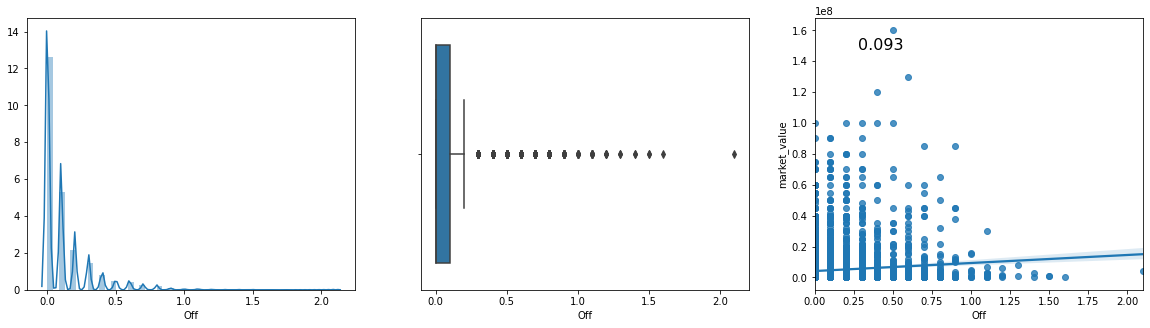

In [41]:
print(df_final.Off.describe())
cor=df_final['Off'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Off, ax=ax1)
sns.boxplot(df_final.Off, ax=ax2)
sns.regplot(x='Off', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Disp (Dispossessed per game)</b></h5>

count    6712.000000
mean        0.593340
std         0.503525
min         0.000000
25%         0.200000
50%         0.500000
75%         0.900000
max         3.800000
Name: Disp, dtype: float64


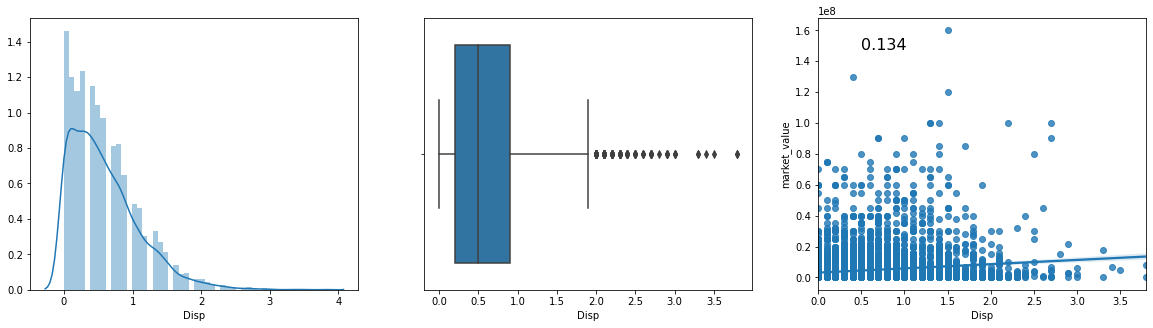

In [42]:
print(df_final.Disp.describe())
cor=df_final['Disp'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Disp, ax=ax1)
sns.boxplot(df_final.Disp, ax=ax2)
sns.regplot(x='Disp', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>UnsTch (Bad control per game)</b></h5>

count    6712.000000
mean        1.047735
std         0.752171
min         0.000000
25%         0.500000
50%         0.900000
75%         1.500000
max         5.000000
Name: UnsTch, dtype: float64


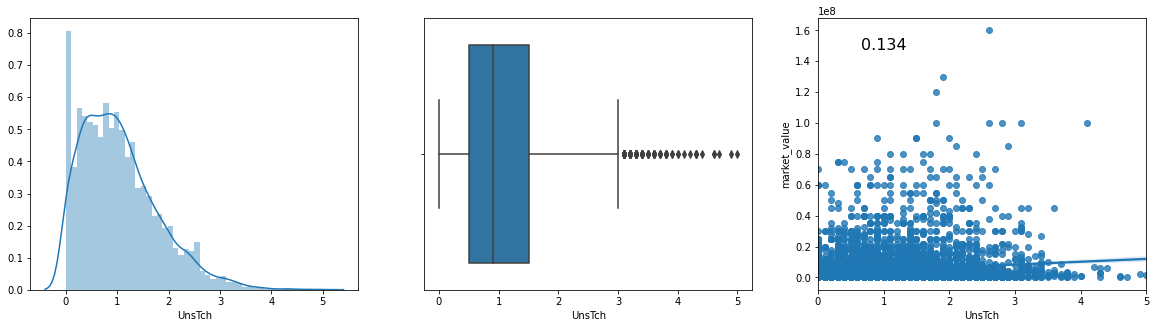

In [43]:
print(df_final.UnsTch.describe())
cor=df_final['UnsTch'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.UnsTch, ax=ax1)
sns.boxplot(df_final.UnsTch, ax=ax2)
sns.regplot(x='UnsTch', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Total_shots</b></h5>

count    6712.000000
mean        0.776058
std         0.664324
min         0.000000
25%         0.300000
50%         0.600000
75%         1.100000
max         5.600000
Name: Total_shots, dtype: float64


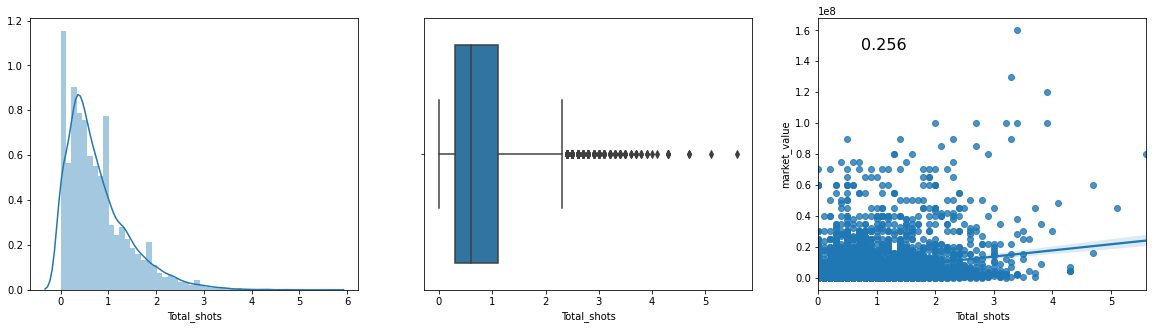

In [44]:
print(df_final.Total_shots.describe())
cor=df_final['Total_shots'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Total_shots, ax=ax1)
sns.boxplot(df_final.Total_shots, ax=ax2)
sns.regplot(x='Total_shots', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>OutOfBox (Shots from outside the penalty area)</b></h5>

count    6712.000000
mean        0.294368
std         0.323718
min         0.000000
25%         0.100000
50%         0.200000
75%         0.400000
max         3.500000
Name: OutOfBox, dtype: float64


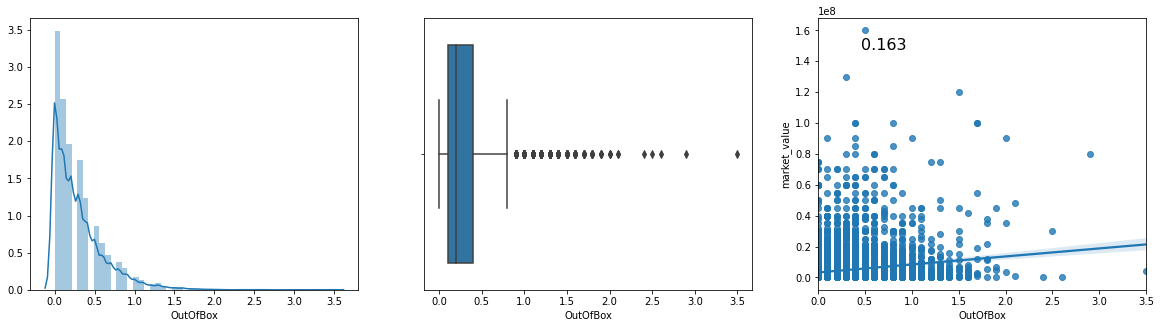

In [45]:
print(df_final.OutOfBox.describe())
cor=df_final['OutOfBox'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.OutOfBox, ax=ax1)
sns.boxplot(df_final.OutOfBox, ax=ax2)
sns.regplot(x='OutOfBox', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>SixYardBox (Shots from inside the six yard box)</b></h5>

count    6712.000000
mean        0.055319
std         0.091763
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max         0.700000
Name: SixYardBox, dtype: float64


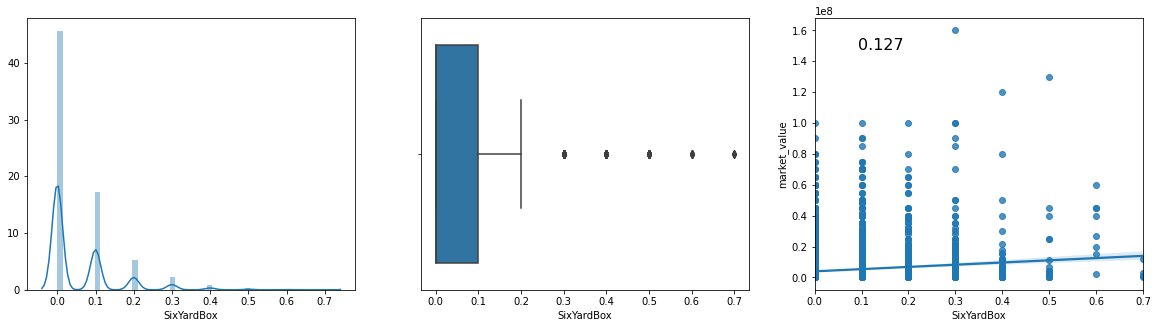

In [46]:
print(df_final.SixYardBox.describe())
cor=df_final['SixYardBox'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.SixYardBox, ax=ax1)
sns.boxplot(df_final.SixYardBox, ax=ax2)
sns.regplot(x='SixYardBox', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>PenaltyArea (Shots from inside the penalty area, excluding six yard box)<b></h5>

count    6712.000000
mean        0.427175
std         0.428493
min         0.000000
25%         0.100000
50%         0.300000
75%         0.600000
max         3.400000
Name: PenaltyArea, dtype: float64


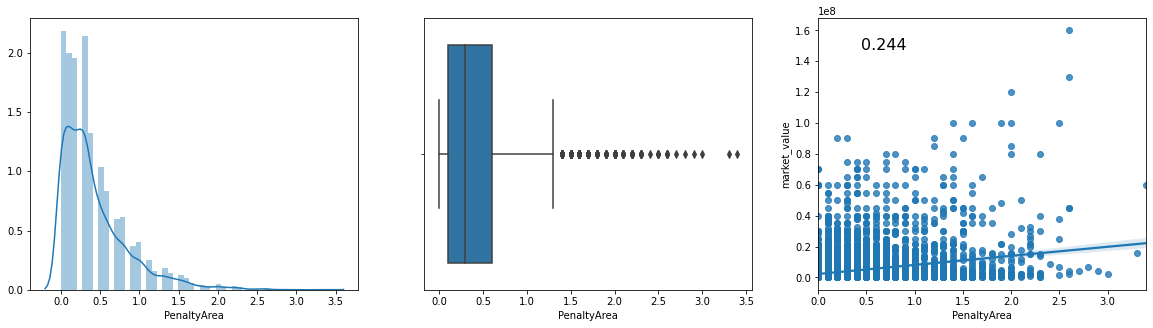

In [47]:
print(df_final.PenaltyArea.describe())
cor=df_final['PenaltyArea'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.PenaltyArea, ax=ax1)
sns.boxplot(df_final.PenaltyArea, ax=ax2)
sns.regplot(x='PenaltyArea', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>KeyP (Key passes per game)<b></h5>

count    6712.000000
mean        0.567133
std         0.489464
min         0.000000
25%         0.200000
50%         0.500000
75%         0.800000
max         6.000000
Name: KeyP, dtype: float64


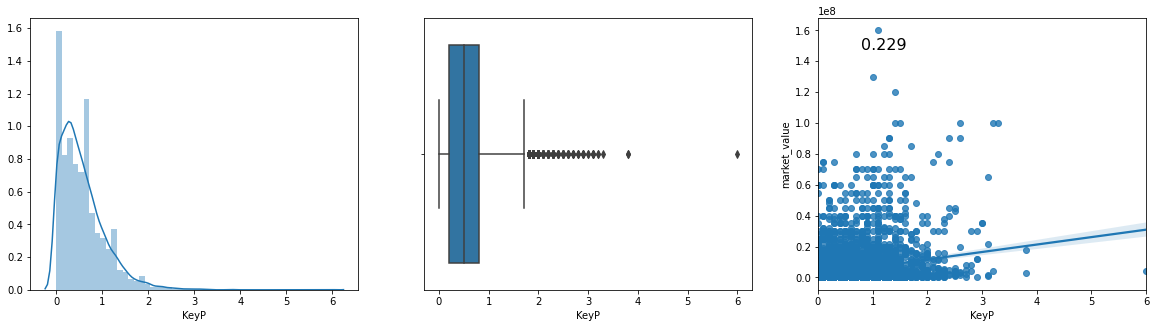

In [48]:
print(df_final.KeyP.describe())
cor=df_final['KeyP'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.KeyP, ax=ax1)
sns.boxplot(df_final.KeyP, ax=ax2)
sns.regplot(x='KeyP', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>AvgP (Passes per game)</b></h5>

count    6712.000000
mean       28.442327
std        14.691048
min         1.700000
25%        17.000000
50%        27.000000
75%        37.800000
max        90.400000
Name: AvgP, dtype: float64


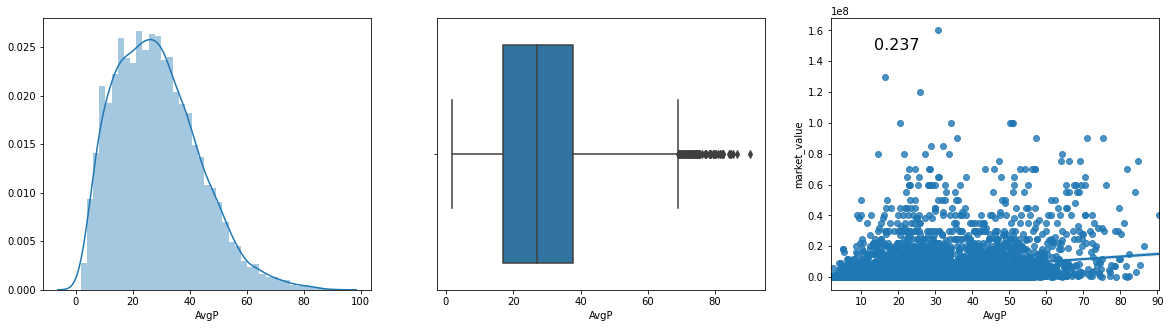

In [49]:
print(df_final.AvgP.describe())
cor=df_final['AvgP'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.AvgP, ax=ax1)
sns.boxplot(df_final.AvgP, ax=ax2)
sns.regplot(x='AvgP', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>Crosses (Crosses per game)</b></h5>

count    6712.000000
mean        0.278069
std         0.403167
min         0.000000
25%         0.000000
50%         0.100000
75%         0.400000
max         5.100000
Name: Crosses, dtype: float64


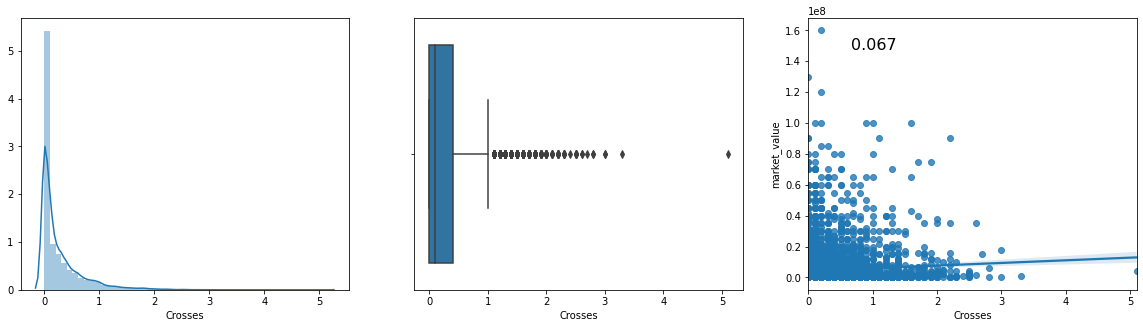

In [50]:
print(df_final.Crosses.describe())
cor=df_final['Crosses'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.Crosses, ax=ax1)
sns.boxplot(df_final.Crosses, ax=ax2)
sns.regplot(x='Crosses', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>LongB (Long balls per game)</b></h5>

count    6712.000000
mean        1.915748
std         1.856118
min         0.000000
25%         0.600000
50%         1.400000
75%         2.700000
max        19.600000
Name: LongB, dtype: float64


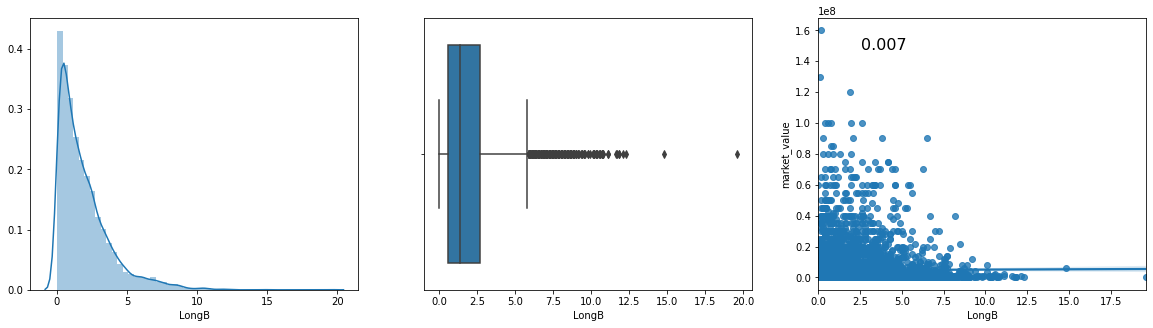

In [51]:
print(df_final.LongB.describe())
cor=df_final['LongB'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.LongB, ax=ax1)
sns.boxplot(df_final.LongB, ax=ax2)
sns.regplot(x='LongB', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>ThrB (Through balls per game)</b></h5>

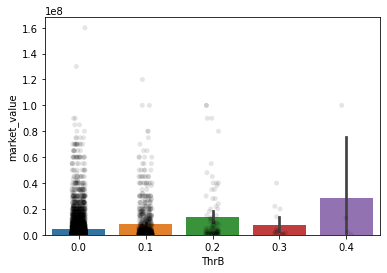

In [52]:
sns.barplot(x='ThrB', y='market_value', data=df_final)
sns.stripplot(x='ThrB', y='market_value', data=df_final, color='0', alpha=.1);

> <h5><b>Main_role</b></h5>

In [53]:
#there a some mistakes to be corrected in the roles name
df_final['Main_role'] = df_final['Main_role'].str.replace(' FW','FW')
df_final['Main_role'] = df_final['Main_role'].str.replace(' GK','GK')
df_final['Main_role'] = df_final['Main_role'].str.replace(' D','D')
df_final['Main_role'] = df_final['Main_role'].str.replace(' AM','AM')
df_final['Main_role'] = df_final['Main_role'].str.replace(' AM','AM')
df_final['Main_role'] = df_final['Main_role'].str.replace(' M','M')
df_final['Main_role'] = df_final['Main_role'].str.replace(' DMC','DMC')

In [54]:
#few more roles that are not correctily listed
df_final.loc[(df_final.Main_role == 'D(R)'),'is_pos_c']=0
df_final.loc[(df_final.Main_role == 'D(R)'),'is_pos_r']=1
df_final['Main_role'] = df_final['Main_role'].str.replace('D\(R\)','D')

df_final.loc[(df_final.Main_role == 'D(L)'),'is_pos_c']=0
df_final.loc[(df_final.Main_role == 'D(L)'),'is_pos_l']=1
df_final['Main_role'] = df_final['Main_role'].str.replace('D\(L\)','D')

df_final['Main_role'] = df_final['Main_role'].str.replace('D\(C\)','D')

df_final['Main_role'] = df_final['Main_role'].str.replace('M\(C\)','D')

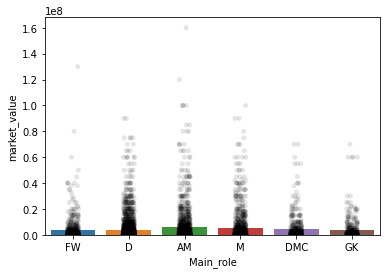

In [55]:
sns.barplot(x='Main_role', y='market_value', data=df_final)
sns.stripplot(x='Main_role', y='market_value', data=df_final, color='0', alpha=.1);

> <h5><b>Height</b></h5>

count    6712.000000
mean        1.818395
std         0.066896
min         1.560000
25%         1.770000
50%         1.820000
75%         1.870000
max         2.060000
Name: height, dtype: float64


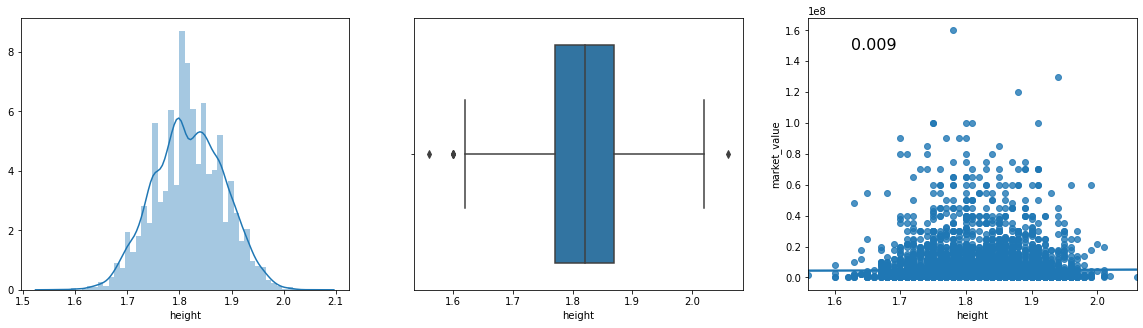

In [56]:
print(df_final.height.describe())
cor=df_final['height'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.height, ax=ax1)
sns.boxplot(df_final.height, ax=ax2)
sns.regplot(x='height', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> <h5><b>foot</b></h5>

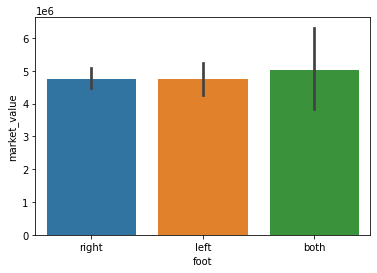

In [111]:
sns.barplot(x='foot', y='market_value', data=df_final);
#sns.stripplot(x='foot', y='market_value', data=df_final, color='0', alpha=.1);

In [115]:
df_prices_order = df_final.sort_values('market_value', ascending = False).iloc[0:10, :] 

In [118]:
df_prices_order[['Name', 'Main_role']]

,Name,Main_role
4406,Kylian Mbappe,AM
2284,Erling Haaland,FW
2987,Harry Kane,AM
6571,Romelu Lukaku,AM
4238,Kevin De Bruyne,M
5677,Neymar,AM
3322,Jadon Sancho,AM
5507,Mohamed Salah,AM
4007,Joshua Kimmich,D
2637,Frenkie de Jong,D


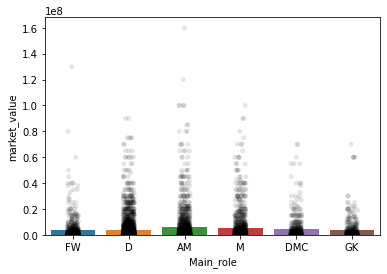

In [114]:
sns.barplot(x='Main_role', y='market_value', data=df_final);
sns.stripplot(x='Main_role', y='market_value', data=df_final, color='0', alpha=.1)
#plt.ylim(0, 16000000);#I set a limit to outline the 

In [102]:
df_final.market_value.max()

160000000.0

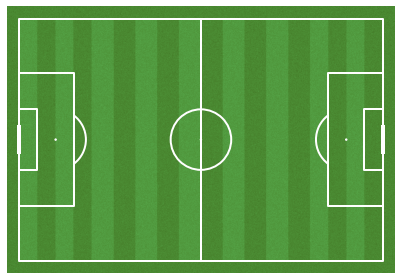

In [94]:
#pip install mplsoccer
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

<h1><b>Features engineering</h1></b>

> First I will remove some features that are redundant or not usefull 


In [58]:
df_final.drop('league_games_tot', axis=1, inplace=True)#this variable refers to a league and not to the players
df_final.drop('date_of_birth', axis=1, inplace=True)#the variable age is already in the dataframe

> Time spent in the current team (in years)

In [59]:
#create an arbitrary date before the last transfer market session
date = pd.to_datetime('2021-06-01')

#compute the difference
df_final['time_at_team_y'] = date - df_final['joined']

#convert in years
df_final['time_at_team_y'] = df_final['time_at_team_y'] / np.timedelta64(1, 'Y')
df_final['time_at_team_y'] = df_final['time_at_team_y'].round(1)

count    6712.000000
mean        2.244473
std         2.091919
min         0.000000
25%         0.800000
50%         1.800000
75%         2.900000
max        18.900000
Name: time_at_team_y, dtype: float64


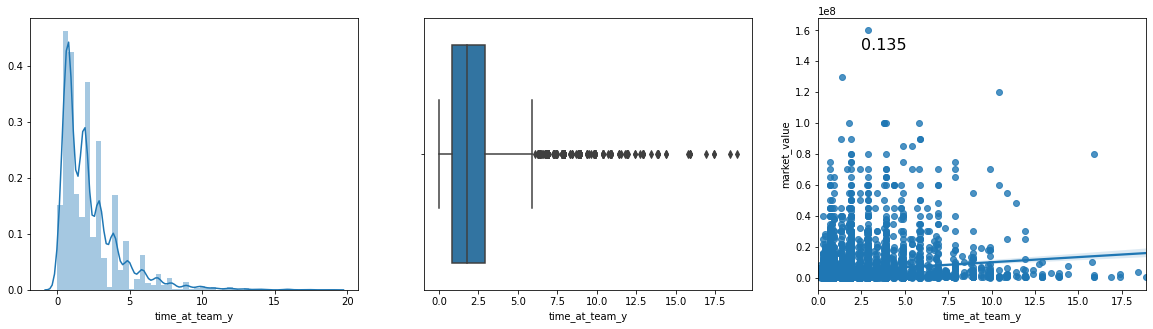

In [60]:
print(df_final.time_at_team_y.describe())
cor=df_final['time_at_team_y'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.time_at_team_y, ax=ax1)
sns.boxplot(df_final.time_at_team_y, ax=ax2)
sns.regplot(x='time_at_team_y', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

> Here I calculate the remaining contract time

In [61]:
#I use the same arbitrary date as before to compute the difference
df_final['contract_duration'] = df_final['contract_until'] - date  

#convert in years
df_final['contract_duration'] = df_final['contract_duration'] / np.timedelta64(1, 'Y')
df_final['contract_duration'] = df_final['contract_duration'].round(1)

#There are some cells where the duration results to be < 0 but it just means that the contract is over and the player is set fro release in the next transfers session
#I simply set their contract duration to 0
df_final.loc[(df_final.contract_duration <= 0),'contract_duration']=0

#according to FIFA rules, professional contracts cannot be longer than 5 years. However, there is a gray zone where
#pre-contracts and national rules allow different solutions. Anyway, there are just a few cases and I will remove those
#players with a contract longer than 5 years (5.5 as criteria just to have an error margin).
df_final.drop(df_final[df_final.contract_duration > 5.5].index, inplace=True)

count    6707.000000
mean        1.434352
std         1.176107
min         0.000000
25%         0.100000
50%         1.100000
75%         2.100000
max         5.100000
Name: contract_duration, dtype: float64


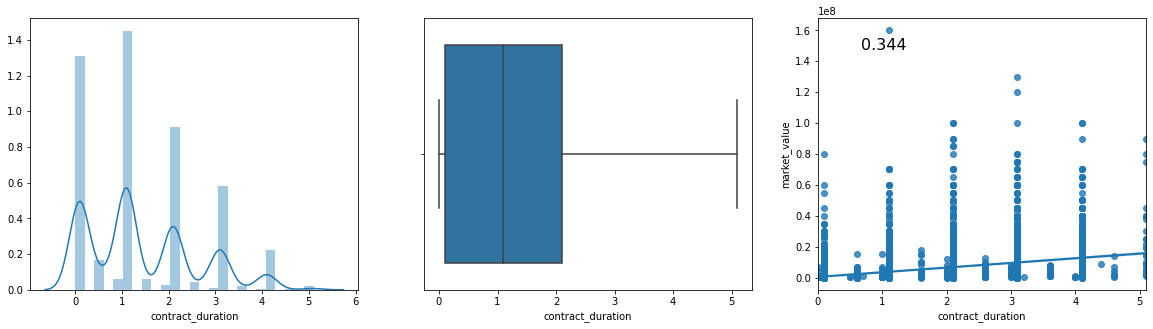

In [62]:
print(df_final.contract_duration.describe())
cor=df_final['contract_duration'].corr(df_final['market_value'])#correlation with market_value
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_final.contract_duration, ax=ax1)
sns.boxplot(df_final.contract_duration, ax=ax2)
sns.regplot(x='contract_duration', y='market_value', data=df_final, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

______________
__________________
________________

In [63]:
#create a dataframe without nominal and binary variables
df_num_vars = df_final.drop(columns=['Name', 'Team', 'League', 'Main_role',
                                      'secondary_role', 'third_role','nationality_1',
                                      'nationality_2', 'nationality_3', 'foot'])

#I also remove the role position since are binary varibles that do not carry much information
df_num_vars = df_num_vars.drop(columns=['is_pos_c', 'is_pos_l', 'is_pos_r',
                                     'is_pos_sec_c', 'is_pos_sec_l', 'is_pos_sec_r',
                                     'is_pos_third_c', 'is_pos_third_l', 'is_pos_third_r'])

In [73]:
df_num_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6707 entries, 0 to 7952
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Age                  6707 non-null   int64         
 1   Apps                 6707 non-null   int64         
 2   start_bench          6707 non-null   int64         
 3   Mins                 6707 non-null   int64         
 4   Goals                6707 non-null   int64         
 5   Assists              6707 non-null   int64         
 6   Yel                  6707 non-null   int64         
 7   Red                  6707 non-null   int64         
 8   SpG                  6707 non-null   float64       
 9   PS_perc              6707 non-null   float64       
 10  AerialsWon           6707 non-null   float64       
 11  MotM                 6707 non-null   int64         
 12  Rating               6707 non-null   float64       
 13  Tackles              6707 non-nul

> Correlation matrix

In [74]:
#filert the variables with best correlations (between 0.3 and -0.3)
corr_matrix = df_num_vars.corr()
corr_matrix = corr_matrix.unstack(level=0)
corr_matrix = pd.DataFrame(corr_matrix)

In [75]:
corr_matrix.rename(columns={0: 'correlation'}, inplace=True)
corr_matrix = corr_matrix[~corr_matrix.iloc[:, 0].between(-0.3, 0.3, inclusive=False)]
corr_matrix = corr_matrix[~(corr_matrix['correlation'] == 1)]
corr_matrix.sort_values('correlation', ascending = False, inplace=True)

In [76]:
corr_matrix

,,correlation
Mins,Apps,0.994123
Apps,Mins,0.994123
tot_apps,seasonal_games_perc,0.943467
seasonal_games_perc,tot_apps,0.943467
Mins,tot_apps,0.906409
...,...,...
UnsTch,LongB,-0.483525
start_bench,LongB,-0.490822
LongB,start_bench,-0.490822
start_bench,AvgP,-0.560233


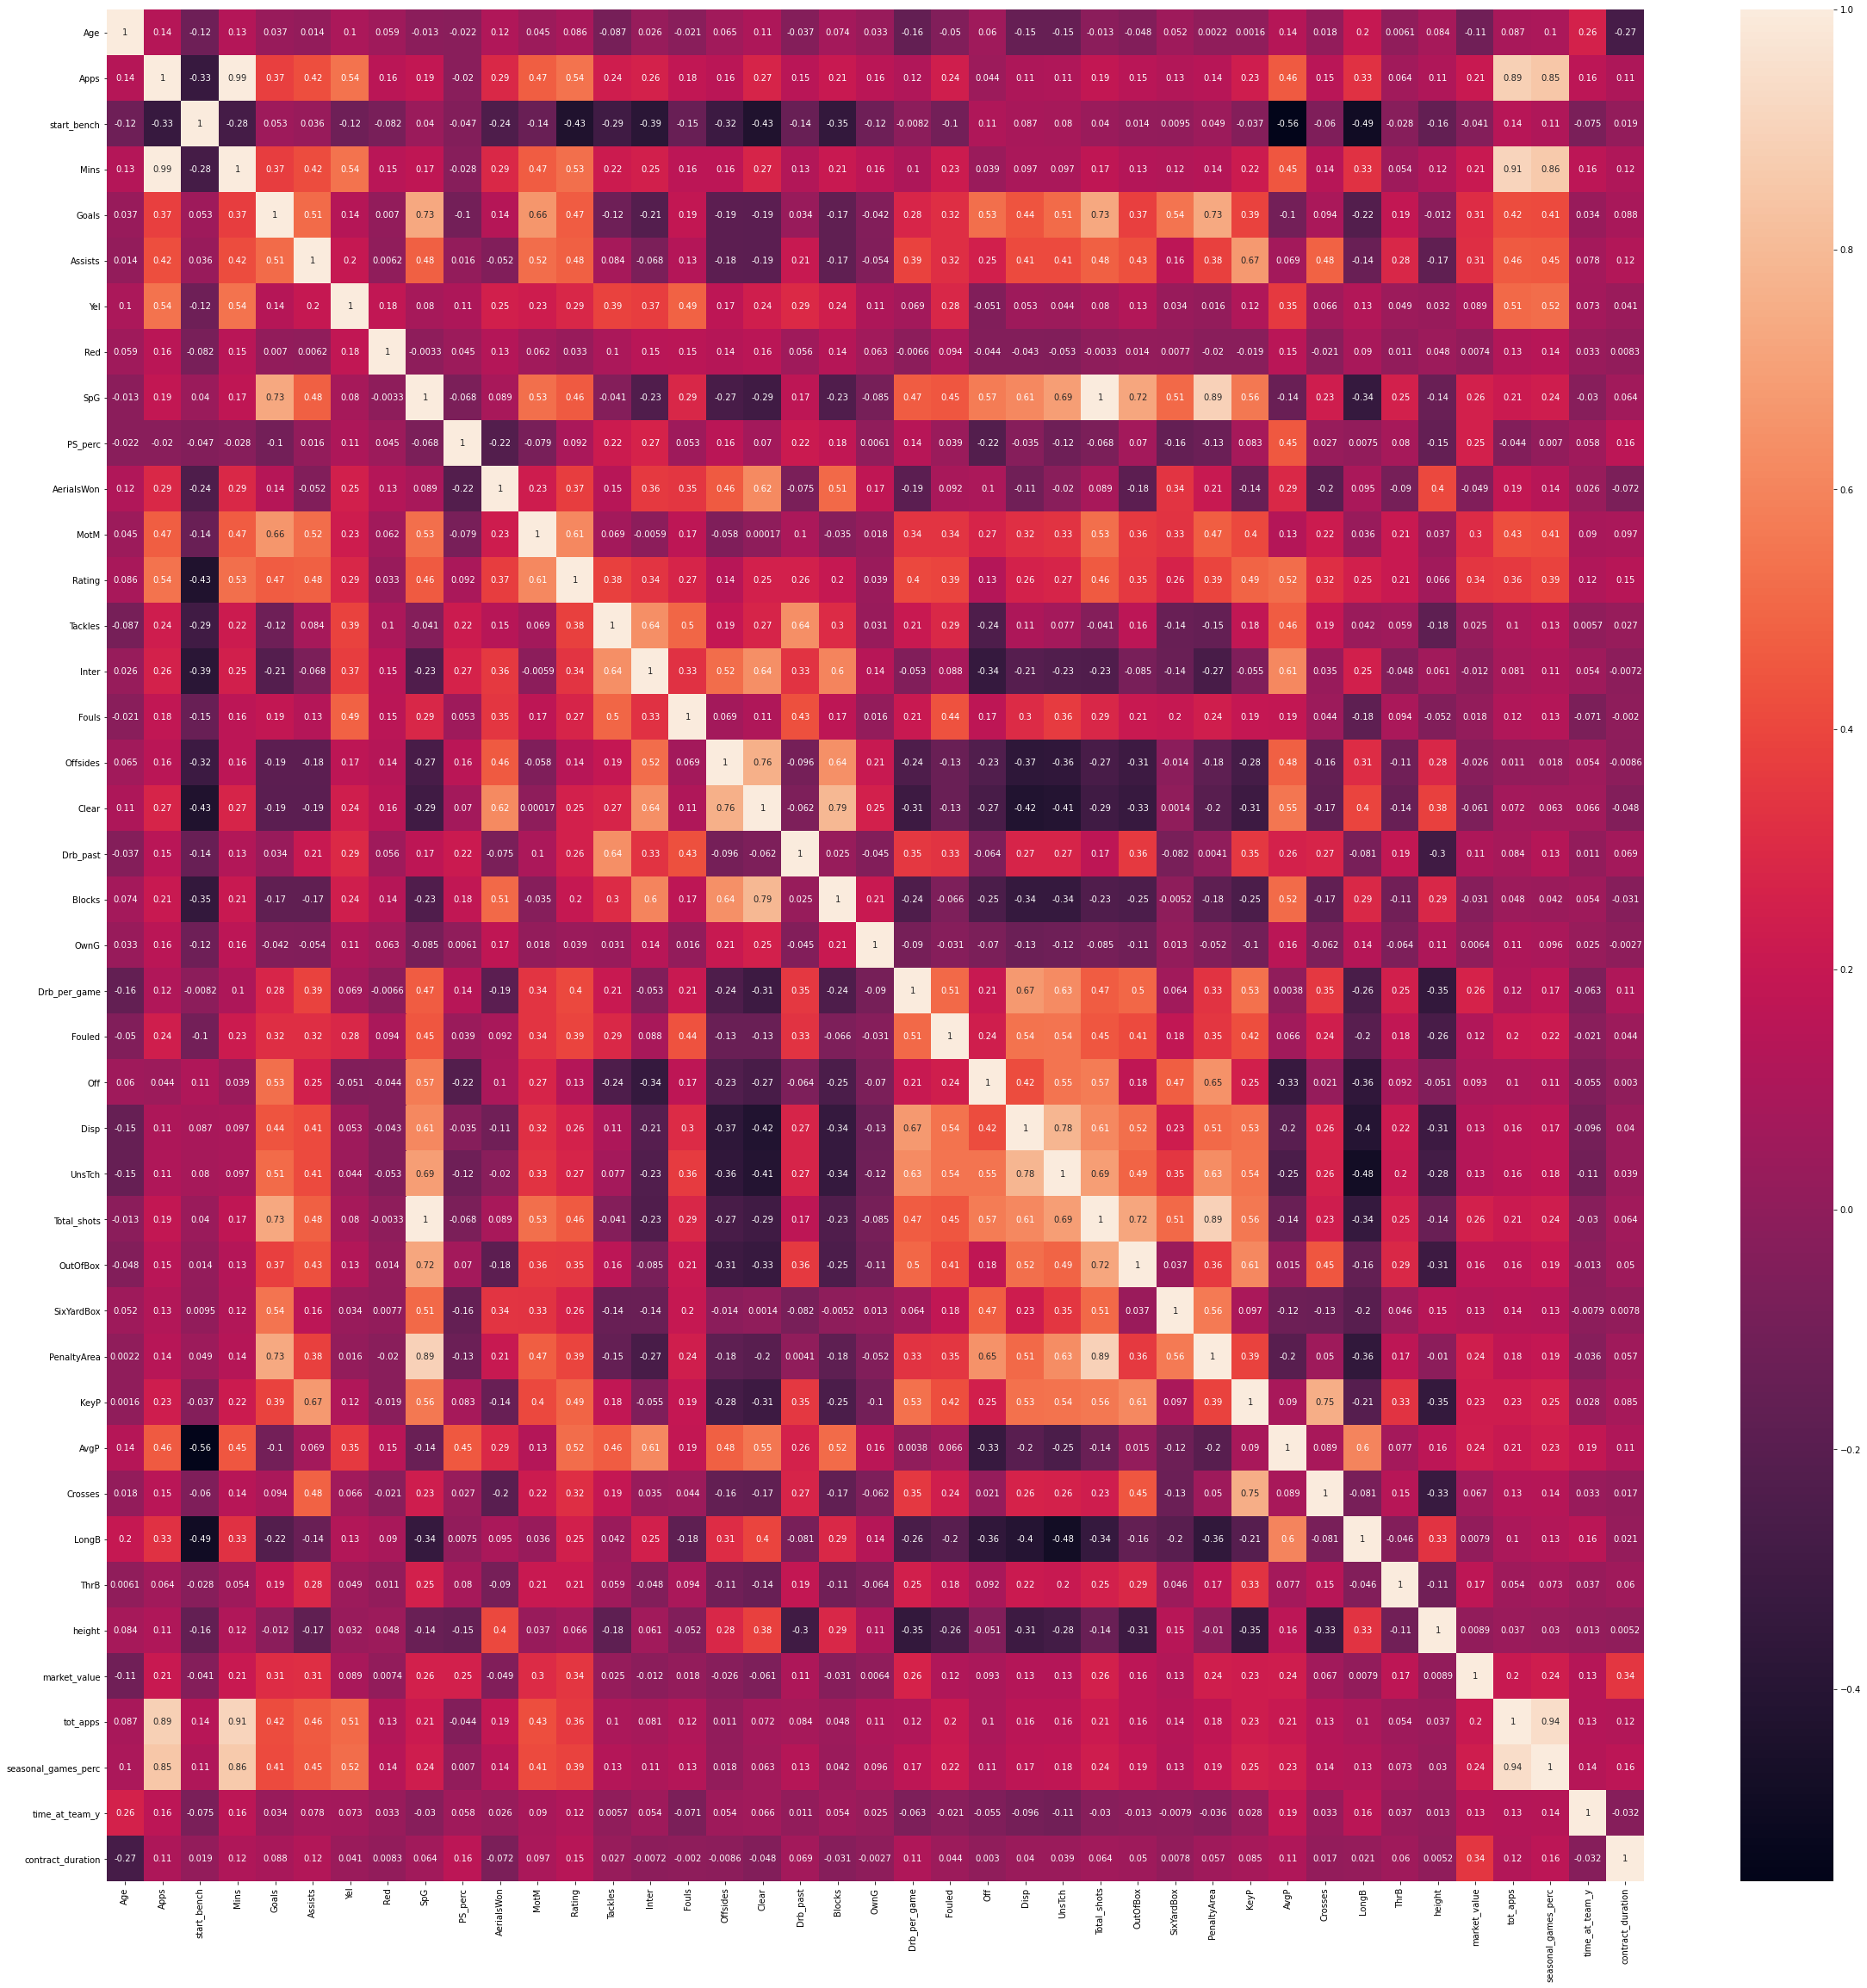

In [77]:
plt.figure(figsize = (40,40))
corrMatrix = df_num_vars.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

> <h1><b>Factor analysis</b></h1>

In [78]:
#references
#https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/factor-analysis/interpret-the-results/all-statistics-and-graphs/
#https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html
#https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [79]:
from sklearn.decomposition import FactorAnalysis

In [80]:
#I cannot timestamps for factos analysis
df_num_vars = df_num_vars.drop(columns=['joined', 'contract_until'])

In [81]:
#check if the data are suitable for factor analysis (source: https://www.datacamp.com/community/tutorials/introduction-factor-analysis)

#pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

chi_square_value,p_value = calculate_bartlett_sphericity(df_num_vars)
print('Bartlett sphericity:', 'chi square=', chi_square_value, '/','p-value=', p_value)

kmo_all,kmo_model = calculate_kmo(df_num_vars)
print('Kaiser-Meyer-Olkin=', kmo_model)

ModuleNotFoundError: No module named 'factor_analyzer'

> The data are suitable base on **Bartlett sphericity test** (p < 0.05)

In [ ]:
from factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df_num_vars)
eigen_values, vectors = fa.get_eigenvalues()

>Define the number of factors based on the Kaiser criterion (n of factors = to the number of eigen values > 1)

In [ ]:
eigen_values = pd.DataFrame(eigen_values)
eigen_values.rename(columns={0 : 'x'}, inplace=True)
eigen_values.loc[(eigen_values.x > 1)]

In [ ]:
plt.scatter(range(1,df_num_vars.shape[1]+1),eigen_values)
plt.plot(range(1,df_num_vars.shape[1]+1),eigen_values)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
df_num_vars.shape

>7 factors should be considered according to the Kaiser criterion

In [ ]:
fa = FactorAnalyzer(n_factors=7, rotation='varimax')
fa.fit(df_num_vars)

In [ ]:
#create a loadings matrix
features = df_num_vars.columns.values
factors = ['factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5', 'factor_6', 'factor_7']
loadings_matrix = pd.DataFrame(fa.loadings_, columns=factors, index=features)

#communalities
communality = fa.get_communalities()
loadings_matrix['communality']= communality

plt.figure(figsize = (20,20))
loadings_matrix.style.background_gradient(cmap='bwr', subset=['factor_1', 'factor_2', 'factor_3', 
                                                              'factor_4', 'factor_5', 'factor_6',
                                                              'factor_7'])

In [ ]:
factor_variance = pd.DataFrame(fa.get_factor_variance())
indx = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
factor_variance = pd.DataFrame(fa.get_factor_variance(), columns=factors, index=indx)
factor_variance

> <h1><b>PCA</b></h1>

In [ ]:
#standardize dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_vars_rescaled = scaler.fit_transform(df_num_vars)

#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=None)#pca transformer (set to none to use all the components)
pca_scores = pca.fit_transform(df_num_vars_rescaled)#apply pca

#print the results
print('loadings matrix:', pca.components_.shape)
#in case of confusion about the components_ shape and on which axis are located the features and components (it might not be trivial while using fit_transform)
#call pca.n_features_ and pca.n_components_
print('eigenvalues matrix:', pca_scores.shape)

In [ ]:
#create a df of loadings 
loadings_train= pd.DataFrame(pca.components_)#loading vectors

loadings_train.columns = [col + 1 for col in loadings_train.columns]#rename the features

features = df_num_vars.columns.values
loadings_train = loadings_train.T#transpose the matrix !!by default components are rows and features/variables columns
loadings_train.index.name = 'features'#add a name to the index (features) to simplify the data manipulation

loadings_train.columns = [col + 1 for col in loadings_train.columns]# + 1 to each column to start from 1 instead of 0
loadings_train = loadings_train.add_prefix ('principal_component_')#add the same prefix to all the columns


loadings_train.head(5)

In [ ]:
#variance ratio table
pca_variance_ratio_train = pd.DataFrame({'principal_component' : range(1, 41 + 1 ,1),#create a series for the components
                                   'proportion_of_variance_explained' : pca.explained_variance_ratio_,
                                   'cumulative' : pca.explained_variance_ratio_.cumsum()})#this is just for the following scree plot

pca_variance_ratio_train.round(3).head(5)

> <h5><b>Scree plot</b></h5>

In [ ]:
#scree plot
plt.figure(figsize=(15,5))

plt.bar(pca_variance_ratio_train.principal_component, pca_variance_ratio_train.proportion_of_variance_explained)
plt.step(pca_variance_ratio_train.principal_component, pca_variance_ratio_train.cumulative, label='cumulative')#this is based on cumsum (check above)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(0, 50)#set limit x to 50
plt.legend()

plt.axhline(y=0.25, c='C3', alpha=0.4)#these lines indicates respectively the 25, 50, 75% of explained variance
plt.axhline(y=0.5, c='C3', alpha=0.4)
plt.axhline(y=0.75, c='C3', alpha=0.4)


plt.xlabel('principal component', fontsize=15)
plt.ylabel('proportion of variance explained', fontsize=15);

In [ ]:
#create a vocabulary
variance_explained_steps = {'10%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.1].count(),
                            '20%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.2].count(),
                            '30%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.3].count(),
                            '40%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.4].count(),
                            '50%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.5].count(),
                            '60%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.6].count(),
                            '70%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.7].count(),
                            '80%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.8].count(),
                            '90%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.9].count(),
                            '100%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=1.01].count()}#the exact maximum is 1.0000004 probably due to the float32 dtype

#convert the vocabulary in df
variance_explained_steps = pd.DataFrame(list(variance_explained_steps.items()),columns = ['proportion_of_variance_explained','number_of_components']) 

In [ ]:
#plot amount of variance explained by the cumulative sum of components
plt.bar(variance_explained_steps.proportion_of_variance_explained, variance_explained_steps.number_of_components)
plt.xlabel('proportion of variance explained', fontsize=15)
plt.ylabel('number of components', fontsize=15)
plt.tick_params(axis='y', labelsize=0, length = 0)#turn off the y ticks to avoid confusion 

#write the number of components on each bar
for index, value in enumerate(variance_explained_steps.number_of_components):
    plt.text(index, value,
             str(value));

> <h5><b>Biplot</b></h5>

In [ ]:
#plot scores (eigenvalues)
plt.scatter(pca_scores[:, 0], pca_scores[:, 1])
plt.xlabel('1st component') # % explained variance
plt.ylabel('2nd component'); # % explained variance

In [ ]:
#plot scores (eigenvalues)
plt.scatter(pca_scores[:, 0], pca_scores[:, 1])
plt.xlabel('1st component') # % explained variance
plt.ylabel('2nd component') # % explained variance

#plot loadings
import matplotlib.patheffects as path_effects

for features in ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
                 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',]:#plot the first 10 features (arbitrary)
    # Get weights
    weight1 = loadings_train.loc[features, 'principal_component_1']*10 # rescale them
    weight2 = loadings_train.loc[features, 'principal_component_2']*10
    # (100 is arbitrary)

    # Plot arrows
    plt.arrow(
        0, 0, # Vector starts at (x,y)=(0,0)
        weight1, weight2, # ends at (x,y)=(weight1, weight2)
        color='black', width=0.5)

    # Add text
    text = plt.text(
        weight1 * 1, # x location (1.5 is arbitrary)
        weight2 * 1, # y location
        features, # Feature name
        weight='bold', color='white')

    # Make the text stand out
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()])

In [ ]:
pca_scores.shape

> <h1><b>Ridge regression</b></h1>

In [ ]:
#drop Name, joined, contract_until
reg_df = df_final.drop(columns=['Name', 'joined', 'contract_until'])

In [ ]:
#define X and y 
X_tr = reg_df.drop('market_value', axis=1)
y_tr = reg_df.market_value

In [ ]:
#Split 80_20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X_tr, y_tr, test_size=0.20, random_state=0)

In [82]:
#Handle categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

from sklearn.compose import ColumnTransformer

cat_columns = reg_df.select_dtypes(exclude=np.number).columns
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

#Handle variables to be log transformed
from sklearn.preprocessing import FunctionTransformer
log_features = ['SpG', 'AerialsWon', 'Tackles', 'Inter', 'Fouls',
               'Clear', 'Drb_past', 'Drb_per_game', 'Fouled', 'Disp',
               'UnsTch', 'Total_shots', 'OutOfBox', 'KeyP', 'Crosses',
               'LongB', 'time_at_team_y']

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', cat_transformer, cat_columns),
        ('log', FunctionTransformer(np.log1p, validate=True), log_features)], #note log1p go avoid infinity issues
    remainder='passthrough')

NameError: name 'reg_df' is not defined

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
#regression model
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

ridge = Ridge()

In [85]:
#pipeline composition
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

NameError: name 'preprocessor' is not defined

In [86]:
#define Target Regressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
regressor = TransformedTargetRegressor(regressor=pipe, func=np.log1p, inverse_func=np.expm1)#regressor accepts pipelines

NameError: name 'pipe' is not defined

In [87]:
#MAE, R2
regressor.fit(X_train, y_train)
print('MAE:', MAE(y_test, regressor.predict(X_test)))
print('R2',regressor.score(X_test, y_test))

#baseline comparison
median_predictions = np.full_like(y_test, np.median(y_train))
print('Median baseline: {:.0f}'.format(MAE(y_test, median_predictions))) 

NameError: name 'regressor' is not defined

> Regularization

In [88]:
# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-10, 10, num=100):
    pipe.set_params(ridge__alpha=alpha)
    regressor.fit(X_train, y_train)
    
    gs_results.append({
        'alpha': alpha,
        'train_mae': MAE(y_train, regressor.predict(X_train)),
        'test_mae': MAE(y_test, regressor.predict(X_test)),
    })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

NameError: name 'pipe' is not defined

In [89]:
plt.semilogx(gs_results['alpha'], gs_results['train_mae'], label='train curve')
plt.semilogx(gs_results['alpha'], gs_results['test_mae'], label='test curve')
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MAE')
plt.legend()
plt.show()

TypeError: list indices must be integers or slices, not str

In [90]:
# Get entry with the best test MSE
best_result = gs_results.loc[gs_results.test_mae.idxmin()]

# Print the details
print('Best alpha: {:.0f}'.format(best_result.alpha))
print('Test MAE: {:,.0f}$'.format(best_result.test_mae))

AttributeError: 'list' object has no attribute 'loc'

In [91]:
#fit the model with the best alpha
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=best_result.alpha))])

regressor = TransformedTargetRegressor(regressor=pipe, func=np.log, inverse_func=np.exp)#regressor accepts pipelines

NameError: name 'preprocessor' is not defined

In [750]:
#MAE, R2
regressor.fit(X_train, y_train)
print('MAE_ridge:', MAE(y_test, regressor.predict(X_test)))
print('R2_ridge',regressor.score(X_test, y_test))

#baseline comparison
median_predictions = np.full_like(y_test, np.median(y_train))
print('Median baseline: {:.0f}'.format(MAE(y_test, median_predictions))) 

MAE_ridge: 2056835.5394624239
R2_ridge 0.7697132847245027
Median baseline: 4372355


In [751]:
#MAE std
y_pred_ridge= regressor.predict(X_test)
error = y_test - y_pred_ridge
error = np.abs(error)
std = error.std()

In [752]:
#Here I save the parameters 
y_pred_ridge= regressor.predict(X_test)#pred
MAE_ridge=MAE(y_test, regressor.predict(X_test))#MAE
std_ridge=std#std
baseline=MAE(y_test, median_predictions)#baseline
R2_ridge=regressor.score(X_test, y_test)#R2

R2 ridge: 0.77
MAE ridge: 2,056,836$ +/- 4,691,758$
Median Baseline: 4,372,355


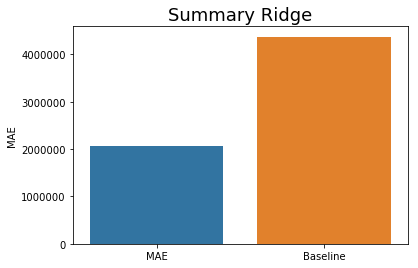

In [755]:
#print
print('R2 ridge:', round(R2_ridge, 3))
print('MAE ridge: {:,.0f}$'.format(round(MAE_ridge, 3)), '+/- {:,.0f}$'.format(round(std_ridge, 3)))
print('Median Baseline: {:,.0f}'.format(round(baseline, 3)))

#save parameters
summary_ridge = {'MAE': [MAE_ridge, baseline],
                  'Param': ['MAE','Baseline']}
summary_ridge = pd.DataFrame(summary_ridge)

#plot
sns.barplot(x='Param', y='MAE',data=summary_ridge).set(xlabel=None)
plt.title('Summary Ridge', size=18);

> <h1><b>Huber loss</b></h1>

In [780]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()

In [781]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('huber', HuberRegressor())
])
regressor = TransformedTargetRegressor(regressor=pipe, func=np.log1p, inverse_func=np.expm1)#regressor accepts pipelines

In [782]:
#MAE, R2
regressor.fit(X_train, y_train)
print('MAE_huber:', MAE(y_test, regressor.predict(X_test)))
print('R2_huber',regressor.score(X_test, y_test))

#baseline comparison
median_predictions = np.full_like(y_test, np.median(y_train))
print('Median baseline: {:.0f}'.format(MAE(y_test, median_predictions))) 

MAE_huber: 2012538.2490682837
R2_huber 0.7955760248106942
Median baseline: 4372355


> Regularization????

In [ ]:
#define X and y 
X_tr = reg_df.drop('market_value', axis=1)
y_tr = reg_df.market_value

________________________________
________________________________
________________________________

__________________________________________
#maybe use a StratifiedShuffleSplit for this
___________________________________________

In [ ]:
df_num_vars

In [813]:
#define X and y 
X_tr = df_num_vars
y_tr = reg_df.Main_role

In [805]:
#Split 80_20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X_tr, y_tr, test_size=0.20, random_state=0)

In [792]:
#Handle categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

from sklearn.compose import ColumnTransformer

cat_columns = reg_df.select_dtypes(exclude=np.number).columns
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

#Handle variables to be log transformed
from sklearn.preprocessing import FunctionTransformer
log_features = ['SpG', 'AerialsWon', 'Tackles', 'Inter', 'Fouls',
               'Clear', 'Drb_past', 'Drb_per_game', 'Fouled', 'Disp',
               'UnsTch', 'Total_shots', 'OutOfBox', 'KeyP', 'Crosses',
               'LongB', 'time_at_team_y']

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', cat_transformer, cat_columns),
        ('log', FunctionTransformer(np.log1p, validate=True), log_features)], #note log1p go avoid infinity issues
    remainder='passthrough')

In [816]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 1000,
                       tol = 1e-3,
                       random_state = 0,
                       class_weight = None,
                       loss = 'modified_huber')

In [795]:
#pipeline composition
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier())
])

In [818]:
#MAE, R2
sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)

In [819]:
y_pred

array(['DMC', 'DMC', 'DMC', ..., 'DMC', 'DMC', 'DMC'], dtype='<U3')

In [807]:
#MAE, R2
pipe.fit(X_train, y_train)
print('MAE:', MAE(y_test, regressor.predict(X_test)))
print('R2',regressor.score(X_test, y_test))

ValueError: 'Team' is not in list

In [803]:
sgd_clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'None'